In [1]:
import pandas as pd
import json

df = pd.read_csv("./wormhole_full_results.csv")
pd.options.display.max_rows = 999
df.columns = ['m', 'k', 'n', 'use_trace', 'grid_size', 'in0_sharded', 'out_sharded',
       'in0_storage_type', 'in1_storage_type', 'out_storage_type', 'dtype',
       'math_fidelity', 'inf_time', 'TFLOPs',
       'Utilization_vs_user', 'Utilization_vs_full)']
df

,m,k,n,use_trace,grid_size,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inf_time,TFLOPs,Utilization_vs_user,Utilization_vs_full)
0,512,512,512,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,378654.0,0.71,0.54%,0.54%
1,512,1024,1024,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,363193.0,2.96,2.26%,2.26%
2,512,1024,2048,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,362425.0,5.93,4.52%,4.52%
3,1024,1024,1024,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360315.0,5.96,4.55%,4.55%
4,1024,1024,2048,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360370.0,11.92,9.09%,9.09%
5,1024,2048,2048,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,361652.0,23.75,18.12%,18.12%
6,2048,2048,2048,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360396.0,47.67,36.37%,36.37%
7,2048,2048,3072,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,357599.0,72.06,54.98%,54.98%
8,2048,3072,3072,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,509491.0,75.87,57.88%,57.88%
9,3072,3072,3072,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,790913.0,73.31,55.93%,55.93%


In [2]:
df_q = df.loc[(df['m'] == df['k']) & (df['k'] == df['n'])].copy()
df_q.reset_index(drop=True, inplace=True)
df_q.drop(["grid_size", "k", "n"], axis=1, inplace=True)
df_q

,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inf_time,TFLOPs,Utilization_vs_user,Utilization_vs_full)
0,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,378654.0,0.71,0.54%,0.54%
1,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360315.0,5.96,4.55%,4.55%
2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360396.0,47.67,36.37%,36.37%
3,3072,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,790913.0,73.31,55.93%,55.93%
4,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,2077090.0,66.17,50.48%,50.48%
5,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,14433700.0,76.18,58.12%,58.12%
6,16384,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,107906000.0,81.52,62.19%,62.19%
7,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,354750.0,0.76,1.15%,1.15%
8,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,358937.0,5.98,9.13%,9.13%
9,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,364318.0,47.16,71.95%,71.95%


In [3]:
print(df_q['dtype'].unique())
print(df_q['math_fidelity'].unique())

['DataType.BFLOAT16' 'DataType.BFLOAT8_B' 'DataType.BFLOAT4_B']
['MathFidelity.HiFi2' 'MathFidelity.HiFi4' 'MathFidelity.LoFi']


## Looking at DataType.BFLOAT16 - MathFidelity.HiFi2	

In [7]:
df_w = df_q.loc[(df_q['math_fidelity'] == "MathFidelity.HiFi2") & (df_q['dtype'] == 'DataType.BFLOAT16')].copy()
df_w.reset_index(drop=True, inplace=True)
df_w

,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inf_time,TFLOPs,Utilization_vs_user,Utilization_vs_full)
0,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,378654.0,0.71,0.54%,0.54%
1,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360315.0,5.96,4.55%,4.55%
2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,360396.0,47.67,36.37%,36.37%
3,3072,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,790913.0,73.31,55.93%,55.93%
4,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,2077090.0,66.17,50.48%,50.48%
5,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,14433700.0,76.18,58.12%,58.12%
6,16384,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,107906000.0,81.52,62.19%,62.19%
7,512,True,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,13051.0,20.57,15.69%,15.69%
8,1024,True,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,36845.2,58.28,44.47%,44.47%
9,2048,True,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,218179.0,78.74,60.08%,60.08%


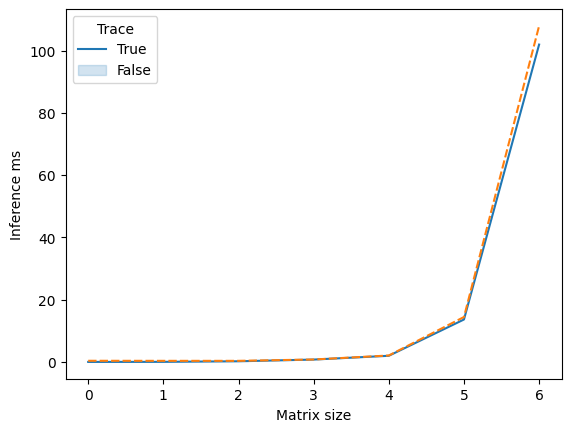

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
inf_time_no_trace = df_w[df_w['use_trace'] == False]['inf_time'].values / 1e6
inf_time_trace = df_w[df_w['use_trace']]['inf_time'].values / 1e6

fig, ax = plt.subplots()
plot = sns.lineplot(data=[inf_time_trace, inf_time_no_trace], ax=ax)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference ns")


plt.legend(title='Trace', loc='upper left', labels=['True', 'False'])
plt.show()


Isolate only the square matmul, drop grid